# Regressione

Nei capitoli scorsi ci siamo concentrati su classi di oggetti, qui invece ci concentriamo su target variabili a scala continua.

## Regressione lineare semplice

L'obiettivo di un modello a regressione variabile semplice (regressione univarita) consiste nel replicare le relazioni esistenti tra un'unica caratteritica (variabile x) e la risposta (variabile target y). L'equazione di un modello lineare con una variabile descrittiva è definito nel seguente modo:

$$y = w_0 + w_1x$$

Il peso $w_0$ rappresenta il punto in cui viene intercettato l'asse $y$ mentre $w_1$ è il coeffieciente della variabile descrittiva .

L'obiettivo è quello di conoscere i pesi dell'equazione lineare per descrivere la relazione esistente fra la variabile descrittiva e la variabile target.

La regressione lineare può essere considerata come la ricerca della retta che attraversa i punti di campionamento come possiamo vedere nella figura sottostante

![regressione](./images/regression.png)

Le linee verticali si chiamano offset o residui e rappresentano gli errori nella previsione.

## Esplorazione del dataset Housing

Introduciamo ora il dataset Housing che contiene le informazioni sulle abitazioni nei dintorni di Boston.
iniziamo subito caricando il dataset

In [1]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Analisi esplorativa dei dati

L'analisi esplorativa dei dati è il primo importante passo consigliato prima di addestrare un modello, i prossimi esempi mostrano la nostra cassetta degli attrezzi per aiutarci a rilevare valori anomali.

Iniziamo col creare una *matrice di dispersione* la quale ci consente di visualizzare le correlazioni tra le coppie delle diverse caratteristiche del dataset.


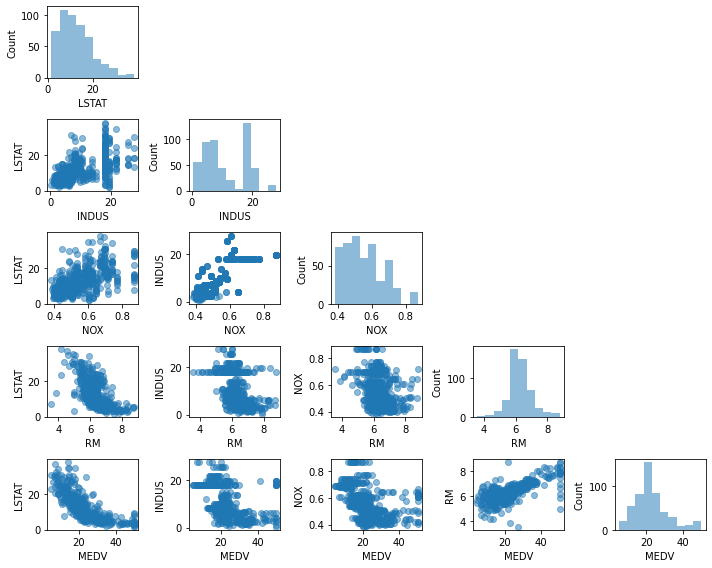

In [2]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), 
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

Per una questione di spazio limitiamo l'analisi per sole 5 caratteristiche, ovviamente è consigliabile con tutte le caratteristiche.
Come prima cosa si nota una relazione lineare tra RM e MEDV inoltre il valore MEDV sembra distribuito in maniera normale ma con qualche valore anomalo.
Per quantificare la relazione lineare fra le caratteristiche, creeremo ora una matrice di correlazione, la stessa correlata alla matrice di covarianza. La matrice di correlazione è la matrice di covarianza ma calcolata su dati standardizzati.
La matrice di correlazione è una matrice quadrata e contiene ai *coefficienti di correlazione Pearson* che misurano la dipendenza lineare fra coppie di caratteritiche. Tali valori sono compresi tra -1 e 1.

Diciamo che due caratteristiche sono perfettamente correlate se $r = 1$ o $r = -1$ mentre non hanno nessuna correlazione se $r = 0$

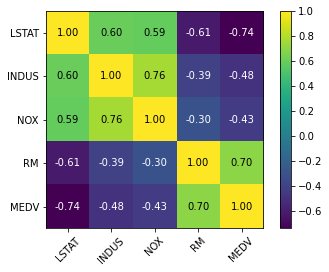

In [3]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.show()

Per analizzare il modello di regressione lineare, siamo interessati a quelle caratteristiche che hanno una elevata correlazione con la variabile MDEV, osservando la matrice vediamo che la variabile target mostra una correlazione elevata con la variabile LSTAT anche se dal grafico si nota che non è propriamente lineare. 
Anche la relazione tra RM e MDEV e abbastanza alta 

## Implementazione di un modello a regressione lineare
Come abbiamo detto la regressione lineare è quel processo che cerca la retta migliore che attraversa i punti campione dei dati di addestramento.

Ma non abbiamo definito cosa significa "migliore" ne abbiamo lavorato su come addestrare il modello. 
Proviamo allora a costruire un modellino per stimare i parametri di regressione, per prima cosa va definita una funzione di costo che andrà minimizzata.
Definiamo dunque la funzione SSE (Sum of Squared Errors) già vista in precedenza:

$$J(w) = \frac{1}{2} \sum_{i=1}^{n}\left( y^i - \hat{y}^i \right) ^ 2$$



In [4]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [5]:
X = df[['RM']].values
y = df['MEDV'].values

In [6]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [7]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

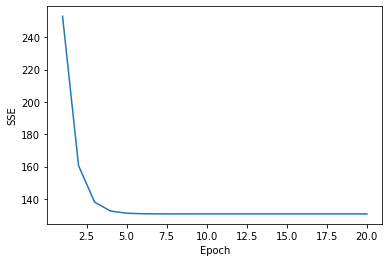

In [8]:

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

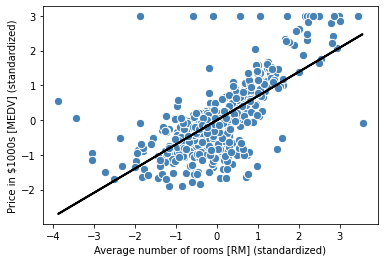

In [10]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [11]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [12]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


Utilizziamo ora il modello LinearRegression messo a disposizione da Sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


Come si vede il modello ha trovato dei pesi differenti, anche perchè ora i dati non sono standardizzati, confrontiamolo con il modello precedente:


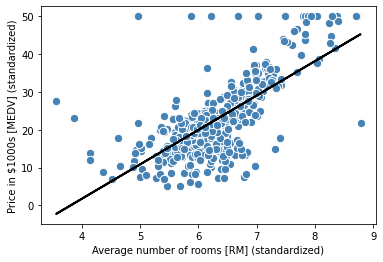

In [15]:

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

## Algoritmo RANSAC

I modelli a regressione lineare possono avere problemi seri in presenza di valori anomali, esistono dei sistemi per rilevare tali valori ma non è sempre una strada facile da percorrere.

Come alternativa possiamo utilizzare il modello RANSAC (RANdom SAmple Consensus) che adatta il modello a regressione lineare al sottoinsieme di dati che "più" seguono la linea.
Possiamo riepilogare tale algoritmo con i seguenti passi:

1. selezionare un numero casuale di campioni in linea e addestrare il modello
2. collaudare tutti gli altri punti dei dati rispetto al modello adatto e aggiungere quei punti che rientrano nella specifica tolleranza rispetto ai valori in linea
3. riadattare il modello a tutti i valori in linea
4. stimare l'errore del modello adattato ai valori in linea
5. se sono state raggiunte le prestazioni desiderare o se è stato superato il numero massimo di iterazioni chiudere l'algoritmo altrimenti riprendere dal primo punto


Comunciamo con l'instanziare l'algoritmo 

In [16]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

Le righe qui sopra impostano il numero massimo di iterazione a 100 e un campionamento di almeno 50 campioni con una soglia per includere i campioni di 5.


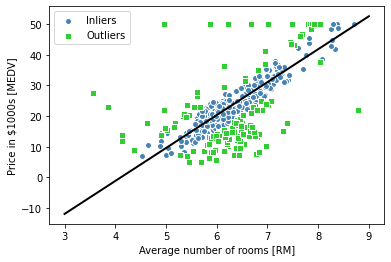

In [17]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')


plt.show()

Utilizzando il sistema RANSAC abbiamo ridotto il potenziale problema dei valori anomali ma non sappiamo se questo ha prodotto un effetto positivo o meno. 
Dobbiamo dunque inserire una parte per valutare il modello.

## Valutazione delle prestazioni nei modelli di regressione lineare
Abbiamo visto come adattare un modello sui dati di train e di test, tuttavia è fondamentale valutare le prestazioni del modello. 
Costruiamo ora un modello di regressione lineare con tutte le features, non potremo più rappresentare il nostro modello con una linea. Possiamo però tracciare i residui rispetto i valori previsti per per valutare le prestazioni del nostro modello.


In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [19]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

qui sotto abbiamo il grafico dei residui, in caso di previsione perfetta tutti i punti delle previsioni dovrebbero sostare sulla linea che passa per lo 0. Ovviamente questo non succederà mai, possiamo anche notare un'altra cosa se notiamo degli schemi probabilmente il nostro modello non sarà in grado di catturare delle informazioni 

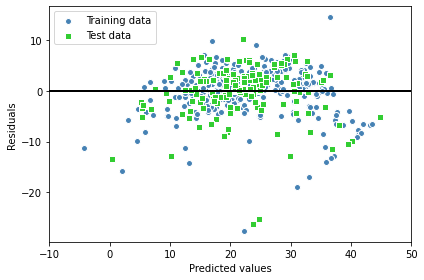

In [20]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

Un'altra misura quantitativa è il cosiddetto MSE che può essere espresso con la formula

$$MSE = \frac{1}{n} \sum_{i=1}^{n}\left( y^i - \hat{y}^i \right) ^ 2$$

In [21]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


Notiamo che l'errore MSE sul dataset di train è pari a 19.96 mentre in test è pari a 27.20 l'ampiezza indica che siamo di fronte ad un problema di overfitting. 

Talvolta può essere utile rilevare il coefficiente di determinazione $R^2$ che puo essere considerato come una versione standardizzata di MSE

In [22]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


## La regolarizzazione

Come abbiamo già visto la regolarizzazione è un approccio per mitigare l'overfitting introducendo delle penalità sui pesi del modello (complessità). 

Gli approcci più utilizzati sono *RIDGE Regression*, *LASSO (Least Absolute Shrinkage and Selection Operator)* ed *Elastic Net*.

*RIDGE Regression* è un modello di penalizzazione L2 la cui formula può essere riassunta come:

$$\sum_{i=1}^{n}\left( y^i - \hat{y}^i \right)^2 + \lambda \lVert w \rVert_2^2 $$

Un approccio alternativo che conduce a modelli sparsi è *LASSO*. 

$$\sum_{i=1}^{n}\left( y^i - \hat{y}^i \right)^2 + \lambda \lVert w \rVert_1 $$

Un compromesso tra la *RIDGE Regression* e la *LASSO* è *Elastic Net* che introduce una penalità L1 e una penalità L2 

$$\sum_{i=1}^{n}\left( y^i - \hat{y}^i \right)^2 + \lambda_1 \lVert w \rVert_2^2 + \lambda_2 \lVert w \rVert_1 $$

Questi modelli a regressione sono tutti i disponibile 

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)


LASSO regression:

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)


Elastic Net regression:

In [25]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

## Trasformare un modello a regressione lineare in uno a regressione a curva polinomiale

Nei paragrafi precedenti abbiamo supposto esitesse una relazione lineare fra le features e l'output. 
Cio non è sempre un supposto valido, si può pensare allora di usare un modello a regressione lineare.

In realtà in sklearn un modello polinomiale viene trasformato un una regressione lineare multipla vediamo come la trasformazione `PolynomialFeatures` creando un polinomio di secondo grado

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [28]:
lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

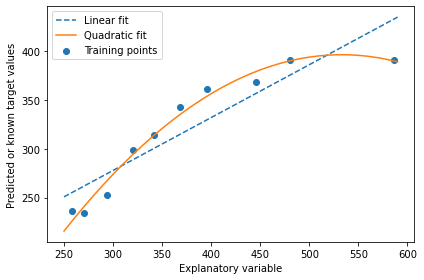

In [29]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

In [30]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [31]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modellazione di relazioni non lineari del dataset Housing

Dopo aver visto come costruire polinomiali per adattare relazioni non lineari su un dataset vero.
Costruiremo un modello di secondo grado e un polinomio di terzo grado.



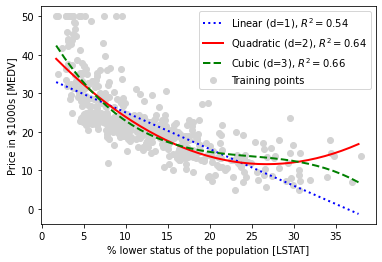

In [32]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

Come si vede la regressione cubica cattura al meglio la relazione tra le variabili ma occorre prestare molta attenzione in quanto aumentando la complessità del modello aumenta anche la probabilità di mandare il modello in overfitting.

Talvota la sola regressione polinomiale non è sempre la scelta migliore. Ad esempio possiamo notare che la relazione *MDEV-LSTAT* sia legata dalla seguente trasformazione log(LSTAT), sqrt(MDEV) vediamo il risultato della traformazione.

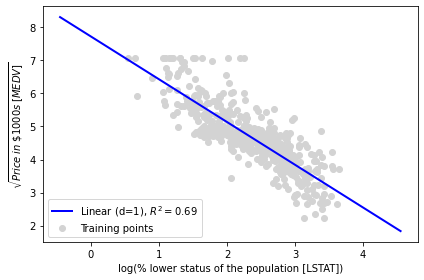

In [33]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

con questa trasformazione otteniamo $R^2 = 0.69$

## Risoluzione delle relazioni non lineari tramite foreste casuali

In questo ultimo paragrafo analizzeremo la regressione a *foresta causale* che è differente rispetto agli altri modelli a regressione. L'algoritmo di regressione tramite albero decisionale suddivide lo spazio di input in regioni compatte, che diventano più gestibili.

### Regressione ad albero decisionale

Inizializziamo ora la regressione con albero decisionale utilizzando la classe `DecisionTreeRegressor`

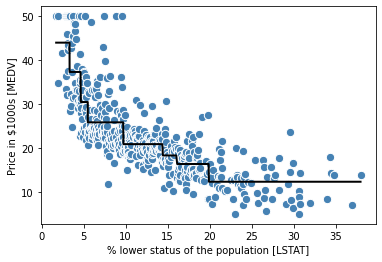

In [34]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()


Come si vede dalla figura qui sopra l'albero decisionale cattura la tendenza dei dati. 
Tuttavia un limite di questo modello è il fatto che non cattura la linearità della previsione desiderata.
Va infine prestata la massima attenzione alla scelta della profondità per non incorrere in problemi di overfitting o underfitting.

### Regressione a foresta casuale

Come abbiamo visto l'algoritmo a foresta casuale è una tecnica di insieme che combina più alberi decisionali.
Una foresta di alberi generalmente ha una prestazione di generalizzazione migliore rispetto ad un singolo albero, proviamo ad applicare tale algoritmo sul dataset.

In [35]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


Si nota subito un problema di overfitting ma il risultato è il migliore che abbiamo ottenuto sino ad ora, visualizziamo ora il grafico dei residui.

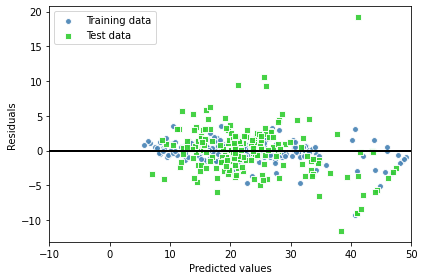

In [37]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()